<a href="https://colab.research.google.com/github/Sawarijamgaonkar/Next_Gen_Dev/blob/main/Movie_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_train = pd.read_csv('/content/drive/MyDrive/Next_Gen_Dev/movie_genre_classification/train__data.txt',sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
df_test = pd.read_csv('/content/drive/MyDrive/Next_Gen_Dev/movie_genre_classification/test__data.txt',sep=':::', names=['Title',  'Description'], engine='python')

Mounted at /content/drive


In [ ]:
df_train

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [ ]:
df_test

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
df_train.drop_duplicates(subset=['Description'], keep='first', inplace=True)

In [ ]:
# after removing duplicate records
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54086 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54086 non-null  object
 1   Genre        54086 non-null  object
 2   Description  54086 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
df_train['Genre'].value_counts()

Genre
 drama           13572
 documentary     13079
 comedy           7429
 short            5061
 horror           2204
 thriller         1590
 action           1313
 western          1032
 reality-tv        882
 adventure         775
 family            774
 music             719
 romance           670
 sci-fi            647
 adult             589
 crime             504
 animation         497
 sport             430
 talk-show         387
 fantasy           321
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

In [ ]:
genre_percentage = df_train['Genre'].value_counts(normalize=True) * 100
print(genre_percentage)

Genre
 drama           25.093370
 documentary     24.181859
 comedy          13.735532
 short            9.357320
 horror           4.074992
 thriller         2.939763
 action           2.427615
 western          1.908072
 reality-tv       1.630736
 adventure        1.432903
 family           1.431054
 music            1.329364
 romance          1.238768
 sci-fi           1.196243
 adult            1.089006
 crime            0.931849
 animation        0.918907
 sport            0.795030
 talk-show        0.715527
 fantasy          0.593499
 mystery          0.589801
 musical          0.512147
 biography        0.489960
 history          0.449284
 game-show        0.358688
 news             0.334652
 war              0.244056
Name: proportion, dtype: float64


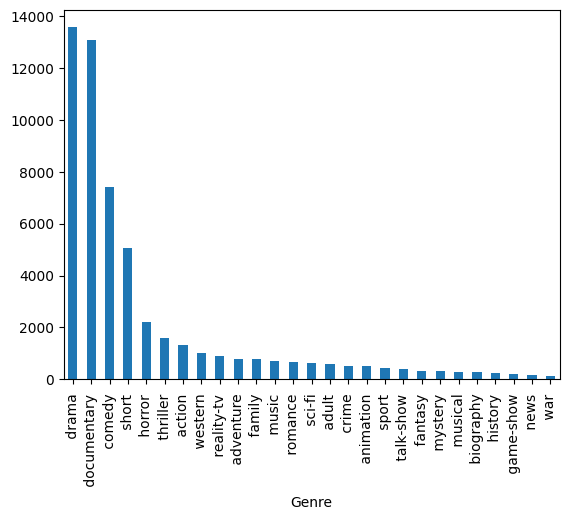

In [ ]:
df_train['Genre'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Load Spacy model
nlp = spacy.load("en_core_web_sm")

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Initialize the stemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Define the preprocessing function
def preprocess(Description):
    # Convert text to lowercase
    Description = Description.lower()
    # Tokenize using spacy
    doc = nlp(Description)
    filtered_tokens = []
    for token in doc:
        # Remove special symbols
        token_text = re.sub(r'[^a-zA-Z0-9]', '', token.text)
        if not token_text:
            continue
        # Remove stopwords and punctuation
        if token_text in stop_words or token.is_punct:
            continue
        # Apply stemming
        stemmed_token = stemmer.stem(token_text)
        filtered_tokens.append(stemmed_token)

    return filtered_tokens

In [ ]:
# Apply preprocessing to the Description column
df_train["text"] = df_train["Description"].apply(lambda text: preprocess(text))
df_train.head()

,Title,Genre,Description,text
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,"[listen, convers, doctor, parent, 10, year, ol..."
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,"[brother, sister, past, incestu, relationship,..."
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,"[bu, empti, student, field, trip, museum, natu..."
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,"[help, unemploy, father, make, end, meet, edit..."
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,"[film, titl, refer, un, recov, bodi, ground, z..."


In [ ]:
if isinstance(df_train['text'].iloc[0], list):
    df_train['text'] = df_train['text'].apply(lambda x: ' '.join(x))

In [ ]:
df_train.head()

,Title,Genre,Description,text
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent 10 year old oscar...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer un recov bodi ground zero also...


In [ ]:
df_test["text"] = df_test["Description"].apply(lambda text: preprocess(text))
df_test.head()

,Title,Description,text
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...","[lr, brane, love, life, car, apart, job, espec..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...","[spain, march, 1964, quico, naughti, child, th..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,"[one, year, life, albin, famili, shepherd, nor..."
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...","[father, die, nt, spoken, brother, 10, year, s..."
5,Er nu zhai (1955),Before he was known internationally as a mart...,"[known, intern, martial, art, superstar, bruce..."


In [ ]:
if isinstance(df_test['text'].iloc[0], list):
    df_test['text'] = df_test['text'].apply(lambda x: ' '.join(x))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(df_train['text'])
x_test=tfidf.transform(df_test['text'])
y_train= df_train['Genre']

In [ ]:
# from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report
from sklearn.metrics import accuracy_score,precision_score

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(max_iter=10000)
# train the model
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# training accuracy
y_pred_lr=model_lr.predict(x_train)
print(classification_report(y_train,y_pred_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.75      0.47      0.58      1313
       adult        0.90      0.44      0.59       589
   adventure        0.85      0.28      0.42       775
   animation        0.85      0.19      0.31       497
   biography        0.00      0.00      0.00       265
      comedy        0.70      0.78      0.74      7429
       crime        0.77      0.10      0.18       504
 documentary        0.74      0.92      0.82     13079
       drama        0.65      0.89      0.75     13572
      family        0.81      0.18      0.30       774
     fantasy        0.89      0.07      0.14       321
   game-show        0.94      0.62      0.75       194
     history        0.00      0.00      0.00       243
      horror        0.79      0.75      0.77      2204
       music        0.81      0.57      0.67       719
     musical        1.00      0.04      0.08       277
     mystery        0.83      0.05      0.09       319
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("accuracy score = ",accuracy_score(y_train,y_pred_lr)*100)

accuracy score =  70.90744370077284


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# define depth of our decision tree in random forest
model_rf=RandomForestClassifier(max_depth=10, random_state=50)
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=50)

In [ ]:
y_pred_rf=model_rf.predict(x_train)
print(classification_report(y_train,y_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00      1313
       adult        0.00      0.00      0.00       589
   adventure        0.00      0.00      0.00       775
   animation        0.00      0.00      0.00       497
   biography        0.00      0.00      0.00       265
      comedy        1.00      0.00      0.00      7429
       crime        0.00      0.00      0.00       504
 documentary        0.54      0.86      0.66     13079
       drama        0.36      0.88      0.51     13572
      family        0.00      0.00      0.00       774
     fantasy        0.00      0.00      0.00       321
   game-show        0.00      0.00      0.00       194
     history        0.00      0.00      0.00       243
      horror        0.00      0.00      0.00      2204
       music        0.00      0.00      0.00       719
     musical        0.00      0.00      0.00       277
     mystery        0.00      0.00      0.00       319
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("accuracy score = ",accuracy_score(y_train,y_pred_rf)*100)

accuracy score =  42.77631919535555


In [ ]:
from sklearn.svm import LinearSVC

# Train the SVM model
model_sv = LinearSVC()
model_sv.fit(x_train, y_train)

LinearSVC()

In [ ]:
# Predict and evaluate
y_pred = model_sv.predict(x_train)
print(classification_report(y_train, y_pred))

               precision    recall  f1-score   support

      action        0.98      0.96      0.97      1313
       adult        1.00      0.97      0.98       589
   adventure        1.00      0.95      0.97       775
   animation        0.99      0.95      0.97       497
   biography        1.00      0.81      0.89       265
      comedy        0.95      0.95      0.95      7429
       crime        0.99      0.92      0.96       504
 documentary        0.94      0.98      0.96     13079
       drama        0.91      0.96      0.94     13572
      family        0.99      0.91      0.95       774
     fantasy        1.00      0.94      0.97       321
   game-show        0.98      0.99      0.99       194
     history        1.00      0.81      0.89       243
      horror        0.96      0.98      0.97      2204
       music        0.99      0.98      0.99       719
     musical        1.00      0.92      0.96       277
     mystery        1.00      0.93      0.96       319
        n

In [ ]:
print("accuracy score = ",accuracy_score(y_train,y_pred)*100)

accuracy score =  94.60303960359427


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_mnb=MultinomialNB()
model_mnb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred_mnb=model_mnb.predict(x_train)
print(classification_report(y_train,y_pred_mnb))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00      1313
       adult        0.00      0.00      0.00       589
   adventure        0.00      0.00      0.00       775
   animation        0.00      0.00      0.00       497
   biography        0.00      0.00      0.00       265
      comedy        0.79      0.09      0.16      7429
       crime        0.00      0.00      0.00       504
 documentary        0.54      0.93      0.68     13079
       drama        0.40      0.90      0.55     13572
      family        0.00      0.00      0.00       774
     fantasy        0.00      0.00      0.00       321
   game-show        0.00      0.00      0.00       194
     history        0.00      0.00      0.00       243
      horror        1.00      0.00      0.00      2204
       music        0.00      0.00      0.00       719
     musical        0.00      0.00      0.00       277
     mystery        0.00      0.00      0.00       319
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("accuracy score = ",accuracy_score(y_train,y_pred_mnb)*100)

accuracy score =  46.35580372000148


In [ ]:
# LinearSVC model for prediction
x_test_predictions=model_sv.predict(x_test)
df_test['Predicted_Genre']=x_test_predictions

In [ ]:
df_test.to_csv("predicted_genre.csv",index=False)
df_test

,Title,Description,text,Predicted_Genre
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",lr brane love life car apart job especi girlfr...,comedy
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march 1964 quico naughti child three bel...,drama
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin famili shepherd north tran...,documentary
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father die nt spoken brother 10 year seriou ca...,drama
5,Er nu zhai (1955),Before he was known internationally as a mart...,known intern martial art superstar bruce lee a...,drama
...,...,...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",cover multipl genr tale light dark antholog we...,drama
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alic cora munro attempt find father british of...,western
54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movi 169 year make oliv twist art dodger fagin...,comedy
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysteri rock dj mike mallard askew bro...,drama
